In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [71]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [72]:
# 把兩個訓練資料集和測試資料集讀進來
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")


#印出前幾筆看資料的狀態
display(df_train.head(5))
display(df_test.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
# Test 資料集沒有 'Survived'

# 資料的比數
df_train.info()
df_test.info()
print(df_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [74]:
# Q2: 測試資料集是否有遺失值?
df_test.duplicated().any().sum()
print(df_test.isnull().any())
print(df_test.isnull().any().sum())
print(df_test.isnull().sum())

# 當有些資料用 "null" 代表空值時，需要先做轉換，
df_test=df_test.replace("null",np.NaN)
print(df_test.isnull().sum())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
3
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [75]:
#可以只顯示存在缺失值的行列，清楚地確定缺失值的狀態
# 代表有缺時的地方才顯示df_train.isnull().values==True
df_train[df_train.isnull().values==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [76]:
# Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，
# 補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。

29.69911764705882
14.526497332334042
29.69911764705882
13.002015226002882


/Users/hongyuyuan/opt/anaconda3/envs/python391/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hongyuyuan/opt/anaconda3/envs/python391/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


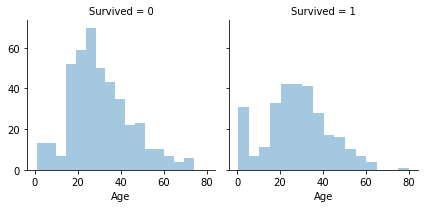

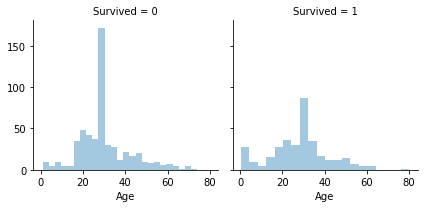

In [77]:
# 用平均數補植
# 補值前
g=sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,"Age",kde=False)

print(df_train["Age"].mean())
print(df_train["Age"].std())

# 補值後
df_train_mean=df_train.copy()
df_train_mean["Age"]=df_train_mean["Age"].fillna(df_train_mean["Age"].mean())

print(df_train_mean["Age"].mean())
print(df_train_mean["Age"].std())
g=sns.FacetGrid(df_train_mean,col='Survived')
g.map(sns.distplot,"Age",kde=False)


29.69911764705882
14.526497332334042
29.87056116722783
14.597667657302386


/Users/hongyuyuan/opt/anaconda3/envs/python391/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hongyuyuan/opt/anaconda3/envs/python391/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


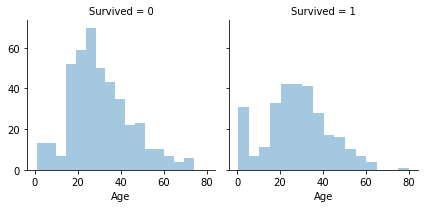

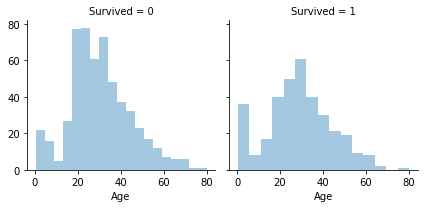

In [78]:
# 由前往後補
# 補值前
g=sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,"Age",kde=False)
print(df_train["Age"].mean())
print(df_train["Age"].std())

# 補值後
df_train_bfill=df_train.copy()
df_train_bfill["Age"]=df_train_bfill["Age"].fillna(method="bfill")
df_train_bfill[df_train_bfill.isnull().values==True]

print(df_train_bfill["Age"].mean())
print(df_train_bfill["Age"].std())
g=sns.FacetGrid(df_train_bfill,col='Survived')
g.map(sns.distplot,"Age",kde=False)


29.69911764705882
14.526497332334042
29.581560044893376
14.554589813600968


/Users/hongyuyuan/opt/anaconda3/envs/python391/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hongyuyuan/opt/anaconda3/envs/python391/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


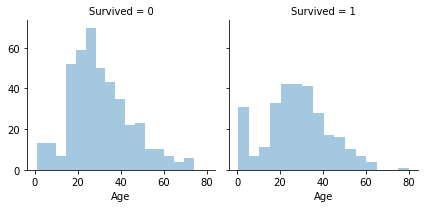

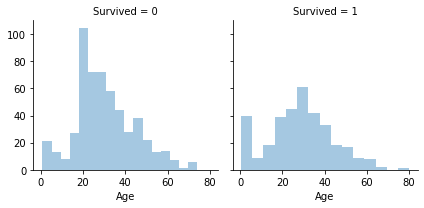

In [79]:
# 由後往前補
# 補值前
g=sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,"Age",kde=False)
print(df_train["Age"].mean())
print(df_train["Age"].std())

# 補值後
df_train_pad=df_train.copy()
df_train_pad["Age"]=df_train_pad["Age"].fillna(method="pad")
df_train_pad[df_train_pad.isnull().values==True]
print(df_train_pad["Age"].mean())
print(df_train_pad["Age"].std())

g=sns.FacetGrid(df_train_pad,col='Survived')
g.map(sns.distplot,"Age",kde=False)

In [80]:
# Fare 缺失值
missing_vals=df_test.isnull().sum()/len(df_test)
missing_vals.sort_values(ascending=False)
missing_vals=pd.DataFrame(missing_vals,columns=["Missing rate"])
print(missing_vals)

             Missing rate
PassengerId      0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.205742
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.002392
Cabin            0.782297
Embarked         0.000000


In [81]:
# 顯示有缺失值的行列
missing_index=df_train.isnull()
display(df_train[missing_index.values==True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


/Users/hongyuyuan/opt/anaconda3/envs/python391/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hongyuyuan/opt/anaconda3/envs/python391/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hongyuyuan/opt/anaconda3/envs/python391/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

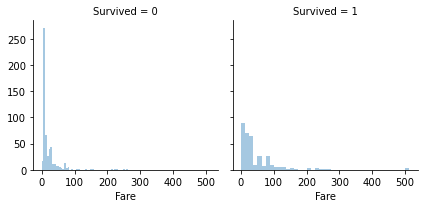

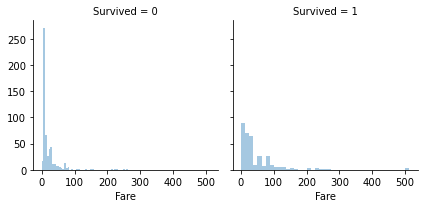

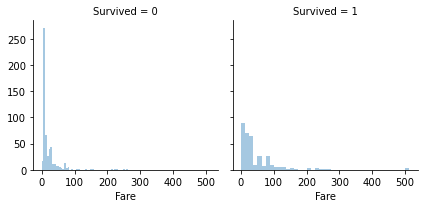

In [82]:
# Fare 變數補值前與後的差異
# 由前往後補
g=sns.FacetGrid(df_train,col="Survived")
g.map(sns.distplot,"Fare",kde=False)

df_fare_bfill=df_train.copy()
df_fare_bfill["Fare"]=df_fare_bfill["Fare"].fillna(method='bfill')
g=sns.FacetGrid(df_fare_bfill,col="Survived")
g.map(sns.distplot,"Fare",kde=False)

# 由後往前
df_fare_pad=df_train.copy()
df_fare_pad["Age"]=df_fare_pad["Age"].fillna(method='pad')
g=sns.FacetGrid(df_fare_pad,col="Survived")
g.map(sns.distplot,"Fare",kde=False)

/Users/hongyuyuan/opt/anaconda3/envs/python391/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

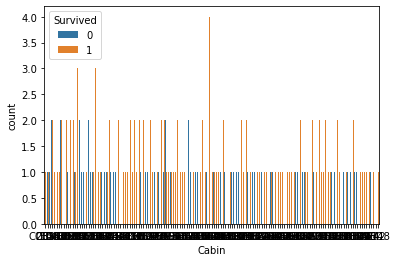

In [83]:
# Cabin 變數補值前與後的差異
sns.countplot(df_train["Cabin"],hue=df_train["Survived"])

In [87]:
df_train[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
73,C62 C64,1.0
97,D21,1.0
94,D17,1.0
95,D19,1.0
60,C148,1.0
...,...,...
67,C46,0.0
64,C30,0.0
59,C128,0.0
56,C124,0.0
